# Neural Networks
## Task 2
### Kmeid Saad, Hussain Hussain

In [1]:
# %load nn17_ex2_load.py
import pickle as pckl  # to load dataset
import matplotlib.pyplot as plt
#import pylab as pl     # for graphics
import numpy as np    

get_ipython().magic('matplotlib inline')

### Reading Data

In [2]:

plt.close('all')   # closes all previous figures

# Load dataset
file_in = open('vehicle.pkl','rb')
vehicle_data = pckl.load(file_in)
file_in.close()

# Training set
X = vehicle_data['train']['X']  # features; X[i,j]...feature j of example i
C = vehicle_data['train']['C']  # classes; C[i]...class of example i
# Test set
Xtst = vehicle_data['test']['X']  # features
Ctst = vehicle_data['test']['C']  # classes

Model Data, In Exercise Sheet 2 we only need to take in consideration
SAAB (C = 2) and BUS(C = 3)
In this step I extract the SAAB and BUS Class for training and testing data sets
Also changed the class number to 1 and 0 respectively

In [3]:
X_train = []
C_train = []

X_test = []
C_test = []
for i in range(len(X)):
        
        # SAAB Class (Train set)
        if(C[i] == 2):
            #print("SAAB: ", i)
            X_train.append(X[i])
            C_train.append(1)
            
        # BUS Class (Train set)
        if(C[i] == 3):
            #print("BUS: ", i)
            X_train.append(X[i])
            C_train.append(0)
            
for i in range(len(Xtst)):
        
        # SAAB Class (Train set)
        if(Ctst[i] == 2):
            #print("SAAB: ", i)
            X_test.append(Xtst[i])
            C_test.append(1)
            
        # BUS Class (Train set)
        if(Ctst[i] == 3):
            #print("BUS: ", i)
            X_test.append(Xtst[i])
            C_test.append(0)
    
X_train = np.asanyarray(X_train)
X_test = np.asanyarray(X_test)
C_train = np.asanyarray(C_train)
C_test = np.asanyarray(C_test)


# shuffle Training and Testing data
limit_1 = np.random.permutation(np.arange(0, len(X_train)))
limit_2 = np.random.permutation(np.arange(0, len(X_test)))

X_train, C_train = X_train[limit_1], C_train[limit_1]
X_test, C_test = X_test[limit_2], C_test[limit_2]

# Probabilistic Generative Model approach

In [4]:



# Model Data, In Exercise Sheet 2 we only need to take in consideration
# SAAB (C = 2) and BUS(C = 3)
#In this step I extract the SAAB and BUS Class
X_saab = []
X_bus = []   
C_saab = []
C_bus = []

Xtst_saab = []
Xtst_bus = []    
Ctst_saab = []
Ctst_bus = []  
def separateByClass(Train_dataset, Train_Class, Test_dataset, Test_Class):  
    
    ## IF WE DELETED THIS SNIPPET, THE NORMALIZED VERSION WILL DO THE SAME AS NON NORMALIZED ONE
    global X_saab,X_bus,C_saab,C_bus,Xtst_saab,Xtst_bus,Ctst_saab,Ctst_bus
    X_saab = []
    X_bus = []   
    C_saab = []
    C_bus = []

    Xtst_saab = []
    Xtst_bus = []    
    Ctst_saab = []
    Ctst_bus = []  
    #############################################################################################
   # for i in range(len(Train_dataset)):        
    
    for i in range(len(Train_dataset)):
        # SAAB Class (Train set)
        if(Train_Class[i] == 1):
            X_saab.append(Train_dataset[i])
            C_saab.append(1)
        # BUS Class (Train set)
        if(Train_Class[i] == 0):
            X_bus.append(Train_dataset[i])
            C_bus.append(0)
        
    for i in range(len(Test_dataset)):
        
        # SAAB Class (Test set)
        if(Test_Class[i] == 1):
            Xtst_saab.append(Test_dataset[i])
            Ctst_saab.append(1)
        # BUS Class (Test set)
        if(Test_Class[i] == 0):
            Xtst_bus.append(Test_dataset[i])
            Ctst_bus.append(0)
    return("...")        

In [5]:


separateByClass(X_train,C_train,X_test,C_test)

# Print New Training Data Info
print("Total Number of New Training data = ", len(X_train))
print("Number of New Features            = ", len(X_train[1]))
print("Classes of New Training data      = ", len(np.unique(C_train)))
print("...")
## Print Test Data Info
print("Total Number of New Testing data = ", len(X_test))
print("Number of New Features           = ", len(X_test[1]))
print("Classes of New Testing data     = ", len(np.unique(C_test)))
print("...")
## Print New Training Classes Data Info
print("Total Number of SAAB Training data = ", len(X_saab))
print("Number of New SAAB Features        = ", len(X_saab[1]))
print("Classes of New SAAB Training data  = ", len(np.unique(C_saab)))
print("....")
print("Total Number of BUS Training data  = ", len(X_bus))
print("Number of New BUS Features         = ", len(X_bus[1]))
print("Classes of New BUS Training data   = ", len(np.unique(C_bus)))
print("....")
## Print New Testing Classes Data Info
print("Total Number of SAAB Testing data = ", len(Xtst_saab))
print("Number of New SAAB Features        = ", len(Xtst_saab[1]))
print("Classes of New SAAB Training data  = ", len(np.unique(Ctst_saab)))
print("....")
print("Total Number of BUS Testing data  = ", len(Xtst_bus))
print("Number of New BUS Features         = ", len(Xtst_bus[1]))
print("Classes of New BUS Testing data   = ", len(np.unique(Ctst_bus)))

Total Number of New Training data =  286
Number of New Features            =  18
Classes of New Training data      =  2
...
Total Number of New Testing data =  149
Number of New Features           =  18
Classes of New Testing data     =  2
...
Total Number of SAAB Training data =  135
Number of New SAAB Features        =  18
Classes of New SAAB Training data  =  1
....
Total Number of BUS Training data  =  151
Number of New BUS Features         =  18
Classes of New BUS Training data   =  1
....
Total Number of SAAB Testing data =  82
Number of New SAAB Features        =  18
Classes of New SAAB Training data  =  1
....
Total Number of BUS Testing data  =  67
Number of New BUS Features         =  18
Classes of New BUS Testing data   =  1


In [77]:

# Parameter Estimation of generative model

def prob_gen(X_train,C_train,X_test,C_test, normalize = False):
    
    # normalization option
    if normalize:
        # normalize training data
        mu = X_train.mean(axis=0)
        X_train = X_train - mu
        std = X_train.std(axis=0)
        X_train = X_train / std
        # normalize test data
        X_test = X_test - mu
        X_test = X_test / std

    separateByClass(X_train,C_train,X_test,C_test)

    prior_saab = len(X_saab)/len(X_train)
    prior_bus =len(X_bus)/len(X_train)
    
    means_saab = np.mean(X_saab, axis=0)
    means_bus = np.mean(X_bus, axis=0)

    S_1 = np.zeros((18,18))
    S_2 = np.zeros((18,18))
    for line in X_saab:
        S_1 += (np.outer((line-means_saab),(line-means_saab)))/len(X_saab)
    
    for line in X_bus:
        S_2 += (np.outer((line-means_bus),(line-means_saab)))/len(X_bus)

    sigma = (prior_saab * S_1) + (prior_bus * S_2)
    sigma_inv = np.linalg.inv(sigma)
    # for class SAAB
    #P_SAAB  = []
    i = 0;
    w_1 = np.dot(sigma_inv,(means_saab-means_bus))

    miu_1 = np.dot(np.transpose(means_saab),sigma_inv)
    miu_2 = np.dot(np.transpose(means_bus),sigma_inv)
    w_0 =((-1.0/2) * np.dot(miu_1,means_saab)) + ((1.0/2) * np.dot(miu_2,means_bus)) + np.log(prior_saab/prior_bus)
    
#    return w_1,w_0
    
    print('Misclassification = {}%'.format(Per_Missclasification (X_test,C_test,w_1,w_0)))

### Computing the Posterior

In [78]:

def logistic(x):
    if x > 0:
        return 1. / (1. + np.exp(-x))
    else:
        return np.exp(x) / (1. + np.exp(x)) 


def Miss_calcGen(X_train,C_train,w_1,w_0):
    missed_res = 0
    f = 0
    for i in range (X_train.shape[0]):
        a=( np.dot(np.transpose(w_1) , X_train[i]) + w_0)
        #y = ( 1 / (1 + np.exp(-a)))
        y = logistic(a)
        #f+=1
       # print(y)
        if C_train[i] == 1:
           # print("In C_1")
            if y < 0.5:
                missed_res +=1
        if C_train[i] == 0:
          #  print("In C_2")
            if y > 0.5:
                missed_res +=1
    return (missed_res)
    
    #P_SAAB.append( 1 / (1 + np.exp(-a)))

In [79]:
# In[13]:


# % missclasification error:

def Per_Missclasification (X_train,C_train,w_1,w_0):
    per = Miss_calcGen(X_train,C_train,w_1,w_0) / X_train.shape[0]*100
    return(per)

In [80]:
# build prob gen model
prob_gen(X_train,C_train,X_test,C_test)
# change here to calculate miss classification for test or for training data


Misclassification = 2.013422818791946%


In [81]:

# build prob gen model
prob_gen(X_train,C_train,X_test,C_test,True)
# change here to calculate miss classification for test or for training data

Misclassification = 2.013422818791946%


# IRLS

In [82]:
# In[416]:


#Sigmoied Function, and its derivation
def sigmoid(x):
    if x > 0:
        return 1. / (1. + np.exp(-x))
    else:
        return np.exp(x) / (1. + np.exp(x)) 


# In[417]:


#direct variable output (sigmoid (W.T*X))
def direct_output(var_w,var_x): 
    var_x = np.dot(np.transpose(var_w),var_x)     
    var_y = sigmoid(var_x)
    return var_y


# In[418]:


# The Cost Function - Cross Entropy
def CeF(y,t):
    if t == 1:
        if y == 0.:
            y = 0.00000001
        return -np.log(y)
    else:
        if y == 1.:
            y = 0.99999999
        return -np.log(1-y)


# In[419]:


# lef the name of the parameters to X_train w_irls C_train, but it actually 
#depends on how you call the function
def Calc_Cef(X_train,w_irls,C_train):
    cost = [] #to retain the cost values after computing the output (y)
    for i in range(len(X_train)):
        y=direct_output(w_irls,X_train[i])
        temp = CeF(y,C_train[i])
        cost.append(temp)
    return sum(cost) #+ np.mean(w_irls[1:19])


# In[420]:


# Define whether the computed output (y) corresponds to the correct class
# here I am actually computing the misclasifications error so the smallest the better!
# not to be confused with the accuracy
def Miss_calc(X_train,w_irls,C_train):
    missed_res = 0
    for i in range(len(X_train)):
        y=direct_output(w_irls,X_train[i])
        if y < 0.5:
            temp = 0
        else:
            temp = 1
        if temp == C_train[i]:
            missed_res += 1
    #print(missed_res)        
    return (missed_res)  

In [126]:
# In[422]:

def IRLS(X_train,C_train,X_test,C_test, normalize = False):
    
    # normalization option
    if normalize:
        # normalize training data
        mu = X_train.mean(axis=0)
        X_train = X_train - mu
        std = X_train.std(axis=0)
        X_train = X_train / std
        # normalize test data
        X_test = X_test - mu
        X_test = X_test / std
    
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    
    features = (X_train.shape[1], 1) #number of features we have for each Image (18, X in the ppt )
    w_irls = (np.random.rand(features[0])-0.5)*10 # W initialized + 1 for Bias
    #w_irls = np.zeros(features[0])
    
    # Cross entropy error - of the initialized model
    # Note: we actually divide the CEE by the number of the training example,
    # in order to make the stopping criterion (eps) independant from the
    # training set
    Train_cost = [Calc_Cef(X_train, w_irls, C_train)/ X_train.shape[0]]
    Test_cost = [Calc_Cef(X_test, w_irls, C_test)/ X_test.shape[0]]

    
    # Miss classification - # Cross entropy error - of the initialized model
    Train_miss = [(1. - Miss_calc(X_train, w_irls, C_train) / X_train.shape[0])]
    Test_miss = [(1. - Miss_calc(X_test, w_irls, C_test) / X_test.shape[0])]
    last_iter = 0
    # Arbitrary range
    for i in range(0, 100):

        Y=[]
        Y2=[]
        for ii in range(len(X_train)):
            y=direct_output(w_irls,X_train[ii])
            Y2.append(y)
            Y.append(y*(1-y))
        R = np.diagflat(Y2)
#         print(Y)
#         print(w_irls)
#         print(np.dot(X_train.T,np.dot(R,X_train)))
        xrx = np.linalg.inv(np.dot(X_train.T,np.dot(R,X_train)))
        xrxx = np.dot(xrx,X_train.T)
        yt = Y2 - C_train
        w_irls -= np.dot(xrxx,(yt))
        #print(w_irls)
        # Calc errors
        Train_cost.append(Calc_Cef(X_train, w_irls, C_train)/X_train.shape[0])
        Test_cost.append(Calc_Cef(X_test, w_irls, C_test)/X_test.shape[0])

        Train_miss.append((1. - Miss_calc(X_train, w_irls, C_train) / X_train.shape[0]))
        Test_miss.append((1. - Miss_calc(X_test, w_irls, C_test) / X_test.shape[0]))

#         print ("Loop Number:",i)
#         # print Train, Test cost results
#         print("Train_cost: {:5.5f}, Test_cost: {:5.5f}".format(Train_cost[-1], Test_cost[-1]))

#         #print Train, Test Missclassification results
#         print("Train_miss: {:5.5f}, Test_miss: {:5.5f}".format(Train_miss[-1], Test_miss[-1]))
        last_iter = i+1
        eps =0.001
         #Stoping criteria, break as soon as the cost (i) > cost(i-1)
        if np.abs(Train_cost[-1] - Train_cost[-2]) < eps:
            print(Train_cost[-1],Train_cost[-2])
            print('Chosen weights vector = {}'.format(w_irls))
            break

    
    plt.figure()
    plt.title("CECF for IRLS")
    p1, = plt.plot(np.arange(len(Train_cost)), Train_cost, "b-")
    p2, = plt.plot(np.arange(len(Test_cost)), Test_cost, "r-")
    plt.legend([p1, p2], ["Train set", "Test set"])
    plt.xlabel("Iterations")

    plt.figure()
    plt.title(" Misclassification Rate for IRLS")
    p1, = plt.plot(np.arange(len(Train_miss)), Train_miss, "b-")
    p2, = plt.plot(np.arange(len(Test_miss)), Test_miss, "r-")
    plt.legend([p1, p2], ["Train set", "Test set"])
    plt.xlabel("Iterations")
    plt.show()
    print('Stopped after {} iterations'.format(last_iter))
    print("Train_cost: {:5.5f}, Test_cost: {:5.5f}".format(Train_cost[-1], Test_cost[-1]))

    #print Train, Test Missclassification results
    print("Train_miss: {:5.5f}, Test_miss: {:5.5f}".format(Train_miss[-1], Test_miss[-1]))

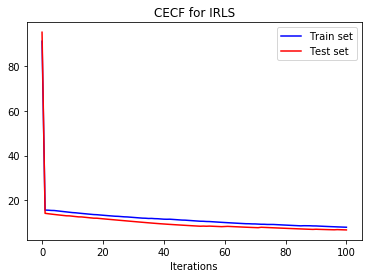

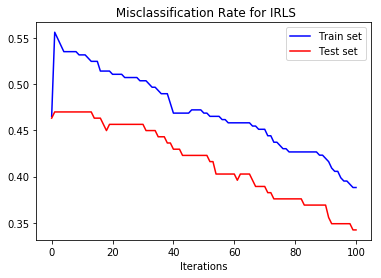

Stopped after 100 iterations
Train_cost: 7.85625, Test_cost: 6.65226
Train_miss: 0.38811, Test_miss: 0.34228


In [127]:
IRLS(X_train,C_train,X_test,C_test,normalize=False)

0.0546288470338 0.0555744108217
Chosen weights vector = [ -0.16869517   0.08298917   0.04892794   1.35879458  21.70156837
 -13.22385722  -0.60636387   9.67313015  10.97876001   3.74407787
  -2.75536277  -5.71155974 -11.65023711   0.89751706   1.35978649
   0.49557272  -0.5403883  -11.36635139   9.38553035]


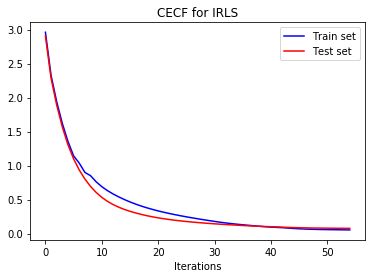

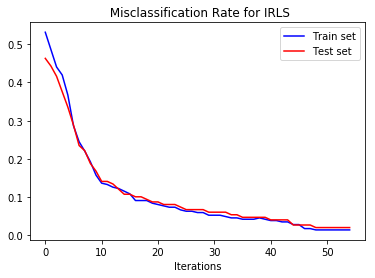

Stopped after 54 iterations
Train_cost: 0.05463, Test_cost: 0.07743
Train_miss: 0.01399, Test_miss: 0.02013


In [128]:
IRLS(X_train,C_train,X_test,C_test,normalize=True)

Recorder this as a lucky initialization vector for the non normalization method
[-0.07522189 -0.47187254  0.0251952   0.16070165 -0.24246046  0.45377792
  0.21868386 -0.20349243 -0.19054764  0.25656792  0.02873869 -0.04303408
  0.05698867  0.1601489  -0.39855905 -0.12551777  0.37222477  0.17398986
  0.28690428]